# **Pymaceuticals Inc.**

Comparison of the performance of Pymaceuticals' drug of interest, Capomulin, against the other treatment regimens
--------------
Results:
========

1. **The sample of this analysis is appropriate.**
    

    The bar charts `pandas_bar` and `pyplot_bar` show that Capomulin is the treatment with the highest number of mice tested (230), and the statistical summary `single_summary_df` and `summary_aggregation_df` demonstrate that,  after Remicane, Capomulin has one of the lowest Tumor Volume standard errors (SE 0.329346). 

    A low standard error provides more confidence in the accuracy of the sample mean and suggests that it is relatively representative of the population. Furthermore, gender is adequately distributed in the mice population (51% male, 49% female), as shown in `fem_mal_pandas_pie`  and `fem_mal_pyplot_pie` .

    There was a duplicate in the sample (Mouse ID, g989, treated with Propiva), but I removed and excluded it from the rest of the analysis. 

2. **Capomulin is effective.**


    In the analysis of a single mouse (l509) treated with Capomulin, the line chart `lineplot` displays that the tumor volume treated with Capomulin significantly decreased after 30 days. 

    Between days 35 and 45, the tumor volume increases slightly again but remains small. 

3. **There is a positive correlation between the weight of a mouse and the average tumor volume.**


    The scatterplot `scatter_plot_weight_tum_vol` demonstrates that the tumor volume increases with the mouse's weight, and a correlation of 0.84% exists between mouse weight and the average tumor volume.
 
    In the last graph `scatterplot_line` , it is possible to visualize the linear regression that confirms the correlation between the two variables and its trend. 


Prepare the Data
======


In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
#Displaying the head of the data frames to check columns to merge
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single DataFrame

mouse_results_df =  pd.merge(mouse_metadata,study_results, how="right",on=["Mouse ID"])
# Display the data table for preview
mouse_results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [6]:
# Checking the number of mice.
total_mouse = mouse_results_df["Mouse ID"].nunique()
total_mouse


249

In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
clean_mouse_ID = mouse_results_df.loc[mouse_results_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
clean_mouse_ID

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 

clean_mouse_df = mouse_results_df.loc[mouse_results_df["Mouse ID"] == "g989", :]
clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
unique_mouse_df = mouse_results_df[mouse_results_df["Mouse ID"].isin(clean_mouse_ID)==False]
unique_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [10]:
# Checking the number of mice in the clean DataFrame.
total_cleaned_mice = unique_mouse_df["Mouse ID"].nunique()
total_cleaned_mice

248

Generate Summary Statistics
===========================
Use the cleaned DataFrame `unique_mouse_df` for the remaining steps of the analysis.

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = unique_mouse_df ["Tumor Volume (mm3)"].groupby(unique_mouse_df["Drug Regimen"]).mean()
median = unique_mouse_df ["Tumor Volume (mm3)"].groupby(unique_mouse_df["Drug Regimen"]).median()
variance = unique_mouse_df ["Tumor Volume (mm3)"].groupby(unique_mouse_df["Drug Regimen"]).var()
standard_deviation = unique_mouse_df ["Tumor Volume (mm3)"].groupby(unique_mouse_df["Drug Regimen"]).std()
sem = unique_mouse_df ["Tumor Volume (mm3)"].groupby(unique_mouse_df["Drug Regimen"]).sem()
# Assemble the resulting series into a single summary DataFrame.
single_summary_df = pd.DataFrame({
    "Mean Tumor Volume": mean,
    "Median Tumor Volume":median,
    "Tumor Volume Variance":variance,
    "Tumor Volume Std. Dev.":standard_deviation,
    "Tumor Volume Std. Err.":sem
})

single_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_aggregation_df = unique_mouse_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median","var","std", "sem"])
summary_aggregation_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

Create Bar Charts and Pie Charts
===============
Generate two bar charts. 
Both charts should be identical and show the total total number of rows (Mouse ID/Timepoints) for each drug regimen throughout the study.

Create the first bar chart with the Pandas `DataFrame.plot()` method.

Create the second bar chart with Matplotlib's `pyplot` methods.

In [13]:
#Finding out how many mice received each treatment
mice_and_drugs = unique_mouse_df["Drug Regimen"].value_counts()
mice_and_drugs

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

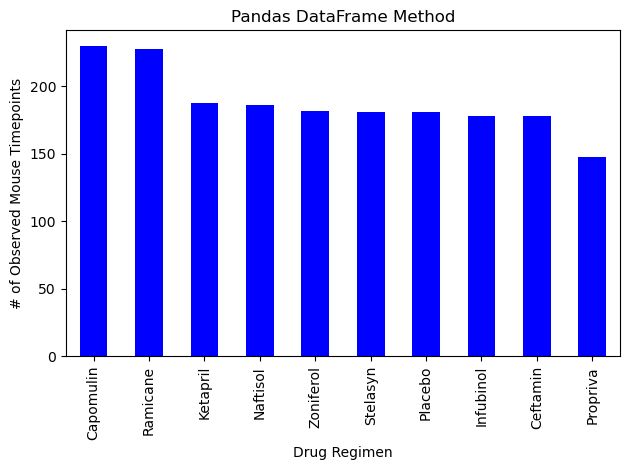

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pandas_bar = mice_and_drugs.plot.bar(color='blue')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Pandas DataFrame Method")
plt.tight_layout()
plt.savefig("pandas_bar")

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
 
#Establish x and y axis
x_axis = mice_and_drugs.index.values
y_axis = mice_and_drugs.values

In [16]:
#Checking variables
x_axis


array(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
       'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva'],
      dtype=object)

In [17]:
y_axis

array([230, 228, 188, 186, 182, 181, 181, 178, 178, 148])

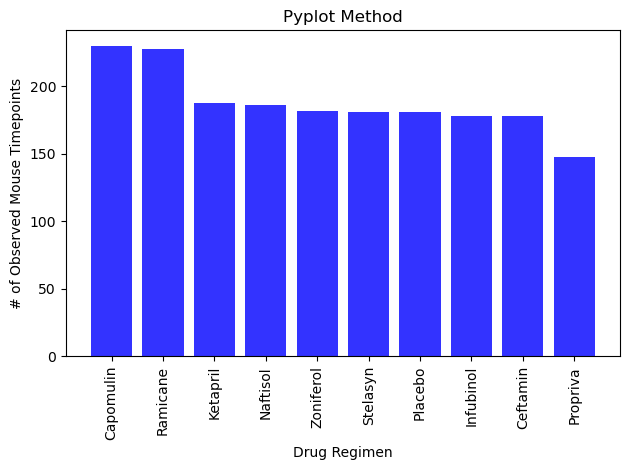

In [18]:
#Create a pyplot bar
plt.bar(x_axis,y_axis, color="blue", alpha=0.8, align="center") 
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Pyplot Method")
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.savefig("pyplot_bar")
plt.show()

*Part 2:*   

Generate two pie charts. 

Both charts should be identical and show the distribution of female versus male mice in the study.

Create the first pie chart with the Pandas `DataFrame.plot()` method.

Create the second pie chart with Matplotlib's `pyplot` methods.

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
fem_male = unique_mouse_df["Sex"].value_counts()
fem_male

Sex
Male      958
Female    922
Name: count, dtype: int64

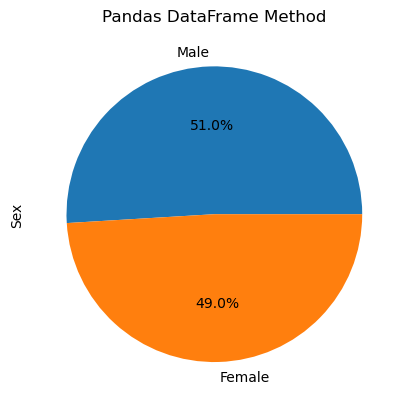

In [20]:
fem_male.plot.pie(autopct= "%1.1f%%")
plt.ylabel("Sex")
plt.title("Pandas DataFrame Method")
plt.savefig("fem_mal_pandas_pie")
plt.show()

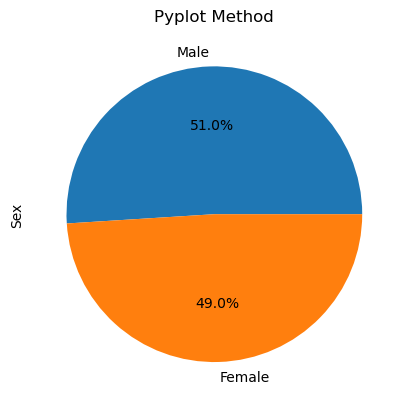

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = ["Male", "Female"]
# The values of each section of the pie chart
sizes = [51,49]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels,
       autopct="%1.1f%%", shadow=False)
plt.ylabel("Sex")
plt.title("Pyplot Method")
plt.savefig("fem_mal_pyplot_pie")
plt.show()

Calculate Quartiles, Find Outliers, and Create a Box Plot
==============

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#Capomulin
Capomulin_df =unique_mouse_df.loc[unique_mouse_df["Drug Regimen"] == "Capomulin",:] 

Capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
226,j246,Capomulin,Female,21,21,0,45.000000,0
227,r554,Capomulin,Female,8,17,0,45.000000,0
228,s185,Capomulin,Female,3,17,0,45.000000,0
229,b742,Capomulin,Male,7,21,0,45.000000,0
...,...,...,...,...,...,...,...,...
1854,s710,Capomulin,Female,1,23,45,40.728578,1
1859,j119,Capomulin,Female,7,23,45,38.125164,1
1878,i557,Capomulin,Female,1,24,45,47.685963,1
1888,r944,Capomulin,Male,12,25,45,41.581521,2


In [23]:
Cap_max_tp = Capomulin_df.groupby("Mouse ID").max()["Timepoint"]
Cap_max_tp

Mouse ID
b128    45
b742    45
f966    20
g288    45
g316    45
i557    45
i738    45
j119    45
j246    35
l509    45
l897    45
m601    45
m957    45
r157    15
r554    45
r944    45
s185    45
s710    45
t565    45
u364    45
v923    45
w150    10
w914    45
x401    45
y793    45
Name: Timepoint, dtype: int64

In [24]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Cap_tum_vol = pd.DataFrame (Cap_max_tp)
Cap_tum_vol

,Timepoint
Mouse ID,
b128,45
b742,45
f966,20
g288,45
g316,45
i557,45
i738,45
j119,45
j246,35


In [25]:
#Merging with original DataFrame
Cap_tum_vol_merge = pd.merge(Cap_tum_vol, unique_mouse_df, on=("Mouse ID", "Timepoint"), how="left")
Cap_tum_vol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [26]:
#Ramicane
Ramicane_df = unique_mouse_df.loc[unique_mouse_df["Drug Regimen"] == "Ramicane",:]
Ram_max_tp = Ramicane_df.groupby("Mouse ID").max()["Timepoint"]
Ram_tum_vol = pd.DataFrame(Ram_max_tp)
Ram_tum_vol_merge = pd.merge(Ram_tum_vol, unique_mouse_df, on=("Mouse ID","Timepoint"), how="left")
Ram_tum_vol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [27]:
#Infubinol
Infubinol_df = unique_mouse_df.loc[unique_mouse_df["Drug Regimen"] == "Infubinol",:]
Inf_max_tp = Infubinol_df.groupby("Mouse ID").max()["Timepoint"]
Inf_tum_vol =pd.DataFrame(Inf_max_tp)
Inf_tum_vol_merge = pd.merge(Inf_tum_vol, unique_mouse_df,on=("Mouse ID","Timepoint"), how="left")
Inf_tum_vol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [28]:

#Ceftamin
Ceftamin_df = unique_mouse_df.loc[unique_mouse_df["Drug Regimen"] == "Ceftamin",:]
Cef_max_tp = Ceftamin_df.groupby("Mouse ID").max()["Timepoint"]
Cef_tum_vol = pd.DataFrame(Cef_max_tp)
Cef_tum_vol_merge = pd.merge(Cef_tum_vol, unique_mouse_df,on=("Mouse ID","Timepoint"), how="left")
Cef_tum_vol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


For loop method
===========

Loop through each drug in the treatment list, locating the rows in the merged DataFrame that correspond to each treatment. 

Append the resulting final tumor volumes for each drug to the empty list.

In [29]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_analyzed = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []
#Merge the 4 Dataframes with the 4 treatments analyzed
four_treatments_combo = unique_mouse_df[unique_mouse_df["Drug Regimen"].isin(treatments_analyzed)]
four_treatments_combo

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
29,c326,Infubinol,Female,18,25,0,45.000000,0
30,c139,Infubinol,Male,11,28,0,45.000000,0
31,v339,Infubinol,Male,20,26,0,45.000000,0
32,a577,Infubinol,Female,6,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1879,a644,Ramicane,Female,7,17,45,32.978522,1
1885,i177,Ramicane,Male,10,18,45,33.562402,3
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3


In [30]:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = four_treatments_combo.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
#Reshape dataframe
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
for drug in treatments_analyzed:
    print(drug)

Capomulin
Ramicane
Infubinol
Ceftamin


In [31]:
treatment = 0

for drug in treatments_analyzed:
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)


    if treatment == 0:
        print(f"------------------------------------------------------------")
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} and above {upper_bound} could be {drug} outliers.")
    print(f"------------------------------------------------------------")
    
    treatment+=1
    

------------------------------------------------------------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 and above 51.83 could be Capomulin outliers.
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 and above 54.31 could be Ramicane outliers.
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 and above 82.75 could be Infubinol outliers.
------------------------------------------------------------
The lower quartile of Ceftamin treatments is: 48.72
The upper quartile of Cefta

Using Matplotlib, generate a box plot that shows the distribution of the final tumor volume for all the mice in each treatment group. 

Highlight any potential outliers in the plot by changing their color and style

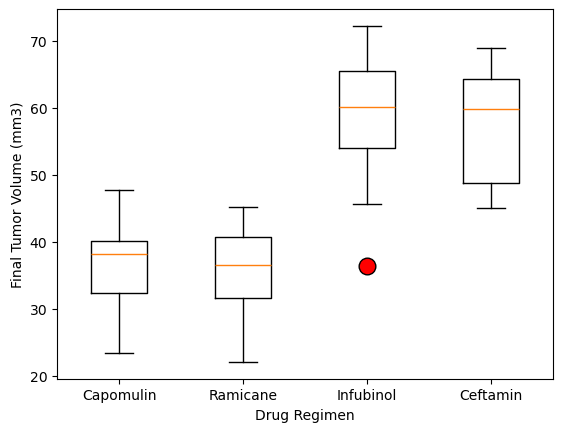

In [32]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_list = []
for drug in treatments_analyzed:
    boxplot_list.append(list(last_timepoint[drug].dropna()))

boxprops = dict(markerfacecolor="red",markersize=12, marker='o')
box_plot_fig = plt.figure()

plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.boxplot(boxplot_list, labels=["Capomulin","Ramicane", "Infubinol", "Ceftamin"], flierprops=boxprops)
plt.savefig("box_plot")
plt.show()

Create a Line Plot and a Scatter Plot
===========
Select a single mouse that was treated with Capomulin, and generate a line plot of tumor volume versus time point for that mouse.

In [33]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
226,j246,Capomulin,Female,21,21,0,45.0,0
227,r554,Capomulin,Female,8,17,0,45.0,0
228,s185,Capomulin,Female,3,17,0,45.0,0
229,b742,Capomulin,Male,7,21,0,45.0,0


In [34]:
#Choosing a mouse = ID l509 (as shows in the starter file) and building the line plot
line_plot_1509 = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
line_plot_1509.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
231,l509,Capomulin,Male,17,21,0,45.000000,0
253,l509,Capomulin,Male,17,21,5,45.851193,0
539,l509,Capomulin,Male,17,21,10,46.759074,0
881,l509,Capomulin,Male,17,21,15,47.488599,1
982,l509,Capomulin,Male,17,21,20,48.070452,2


In [35]:
#Finding out how many mice were treated with Capomulin
mouse_capo = Capomulin_df["Mouse ID"]
mouse_capo = len(mouse_capo)
mouse_capo

230

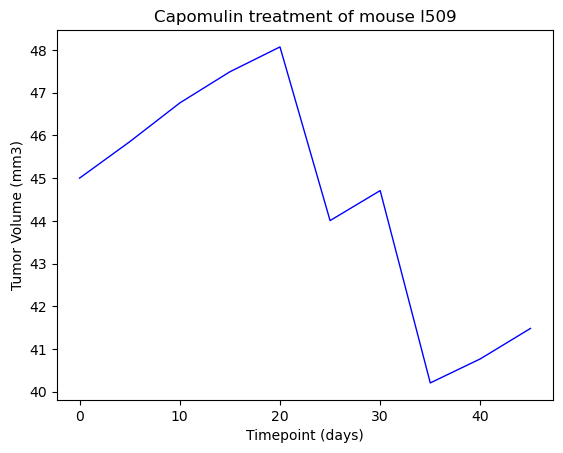

In [36]:
#Line plot

x_axis = line_plot_1509["Timepoint"]
y_axis = line_plot_1509["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis, linewidth=1, color="b")
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.savefig("lineplot")
plt.show()

Generate a scatter plot of mouse weight versus average observed tumor volume for the entire Capomulin treatment regimen

In [37]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

mouse_vs_tumor_capo = Capomulin_df.groupby("Mouse ID")[["Weight (g)", "Tumor Volume (mm3)"]].mean()
mouse_vs_tumor_capo


,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344
i557,24.0,44.805810
i738,20.0,39.141053
j119,23.0,44.465236
j246,21.0,43.216925


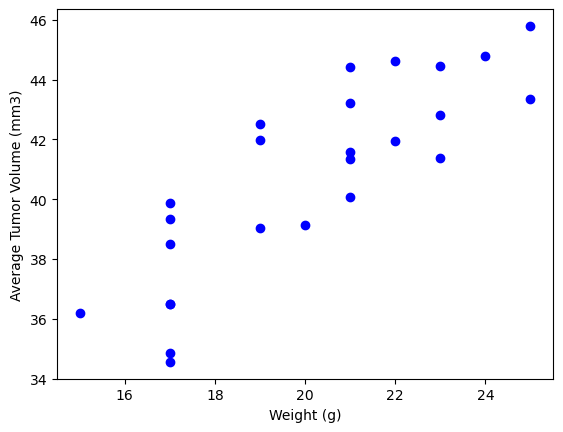

In [38]:
plt.scatter(mouse_vs_tumor_capo["Weight (g)"], mouse_vs_tumor_capo["Tumor Volume (mm3)"], color="b")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.savefig("scatter_plot_weight_tum_vol")
plt.show()

Calculate Correlation and Regression
===========
Calculate the correlation coefficient and linear regression model between mouse weight and average observed tumor volume 
for the entire Capomulin treatment regimen.

In [39]:
# Calculate the correlation coefficient for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = round(st.pearsonr(mouse_vs_tumor_capo["Weight (g)"], mouse_vs_tumor_capo["Tumor Volume (mm3)"])[0],2)

print(f"The correlation between mouse weight and the average tumor volume is: {(correlation)}.")


The correlation between mouse weight and the average tumor volume is: 0.84.


In [40]:
#Calculate the linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen

(capo_slope, capo_int, capo_r, capo_p, capo_std_err) = st.linregress(mouse_vs_tumor_capo["Weight (g)"], mouse_vs_tumor_capo["Tumor Volume (mm3)"])

In [41]:
corr_weigh_tum = mouse_vs_tumor_capo["Weight (g)"] * capo_slope + capo_int
corr_weigh_tum

Mouse ID
b128    42.549834
b742    41.595394
f966    37.777635
g288    39.686515
g316    42.549834
i557    44.458713
i738    40.640954
j119    43.504273
j246    41.595394
l509    41.595394
l897    39.686515
m601    37.777635
m957    39.686515
r157    45.413153
r554    37.777635
r944    45.413153
s185    37.777635
s710    43.504273
t565    37.777635
u364    37.777635
v923    41.595394
w150    43.504273
w914    41.595394
x401    35.868756
y793    37.777635
Name: Weight (g), dtype: float64

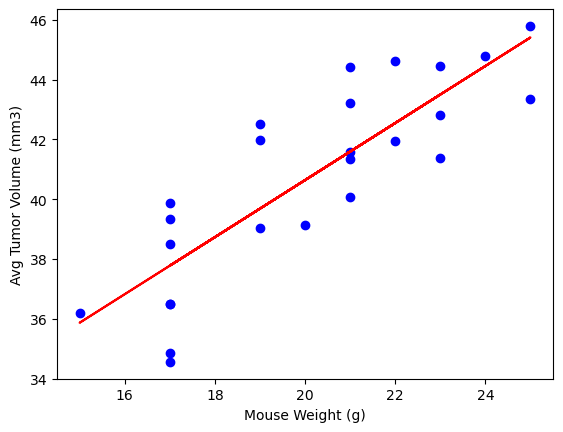

In [42]:
#scatterpolt and line
plt.scatter(mouse_vs_tumor_capo["Weight (g)"],mouse_vs_tumor_capo["Tumor Volume (mm3)"],color="b")
plt.plot(mouse_vs_tumor_capo["Weight (g)"], corr_weigh_tum, color="red")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.savefig("scatterplot_line")
plt.show()
